### Ejercicio 1: Regresión Lineal para la Calidad del Vino

**Tarea:** Usar el conjunto de datos wine-white.csv, realizar el preprocesamiento necesario y entrenar un modelo de regresión lineal para determinar la calidad del vino.

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para mejorar la visualización
sns.set(style="whitegrid")

In [11]:
# Cargar el conjunto de datos
import os
import urllib.request

# Intentar cargar el archivo local primero
file_path = 'wine-white.csv'

if not os.path.exists(file_path):
    print("El archivo no existe localmente. Descargando desde UCI ML Repository...")
    try:
        # URL del dataset Wine Quality (White Wine) en UCI ML Repository
        url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
        
        # Descargar el archivo
        urllib.request.urlretrieve(url, file_path)
        print("✓ Dataset descargado exitosamente.")
    except Exception as e:
        print(f"Error al descargar el archivo: {e}")
        print("Usando dataset alternativo de scikit-learn...")

# Cargar el dataset
try:
    df_wine = pd.read_csv(file_path, sep=';')
    print("\n✓ Dataset cargado exitosamente.")
    print(f"Dimensiones del dataset: {df_wine.shape}")
except FileNotFoundError:
    print("\nNo se pudo cargar el archivo. Usando dataset alternativo...")
    # Como alternativa, crearemos un dataset similar desde sklearn
    from sklearn.datasets import load_wine
    
    wine_data = load_wine()
    df_wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
    df_wine['quality'] = wine_data.target + 3  # Ajustamos para simular escala de calidad
    print("\n✓ Dataset alternativo cargado (sklearn wine dataset).")
    print(f"Dimensiones del dataset: {df_wine.shape}")

if not df_wine.empty:
    # Mostrar las primeras 5 filas
    print("\nPrimeras filas del dataset:")
    display(df_wine.head())

    # Revisar información general y valores nulos
    print("\nInformación del dataset:")
    df_wine.info()

    # Verificar si hay valores nulos
    print("\nSuma de valores nulos por columna:")
    print(df_wine.isnull().sum())
    
    # Estadísticas descriptivas
    print("\nEstadísticas descriptivas:")
    display(df_wine.describe())
    
    # Distribución de la variable objetivo (quality)
    print("\nDistribución de calidad del vino:")
    print(df_wine['quality'].value_counts().sort_index())


✓ Dataset cargado exitosamente.
Dimensiones del dataset: (4898, 12)

Primeras filas del dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

Suma de valores nulos por columna:
fixed acidity           0
volatile acidity        0
citric acid 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000



Distribución de calidad del vino:
quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64


In [6]:
# Separamos el dataset en las características (todas las columnas excepto quality) y la variable que queremos predecir (quality).
if not df_wine.empty:
    # Definir X (características) e y (variable objetivo)
    X = df_wine.drop('quality', axis=1)
    y = df_wine['quality']

    print("Dimensiones de X:", X.shape)
    print("Dimensiones de y:", y.shape)

Dimensiones de X: (4898, 11)
Dimensiones de y: (4898,)


In [7]:
# Dividimos los datos en un conjunto para entrenar el modelo (80%) y otro para evaluarlo (20%).
if not df_wine.empty:
    # Dividir los datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
    print("Tamaño del conjunto de prueba:", X_test.shape[0])

Tamaño del conjunto de entrenamiento: 3918
Tamaño del conjunto de prueba: 980


In [8]:
# Creamos una instancia del modelo LinearRegression y lo entrenamos con los datos de entrenamiento.
if not df_wine.empty:
    # Crear y entrenar el modelo
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)

    print("Modelo de Regresión Lineal entrenado.")

Modelo de Regresión Lineal entrenado.


Realizamos predicciones sobre el conjunto de prueba y evaluamos el rendimiento del modelo utilizando dos métricas comunes para regresión:

- **Error Cuadrático Medio (MSE):** Mide el promedio de los errores al cuadrado. Un valor más bajo es mejor.
- **Coeficiente de Determinación (R²):** Indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Varía entre 0 y 1, donde 1 es un ajuste perfecto.

Error Cuadrático Medio (MSE): 0.5690
Coeficiente de Determinación (R²): 0.2653


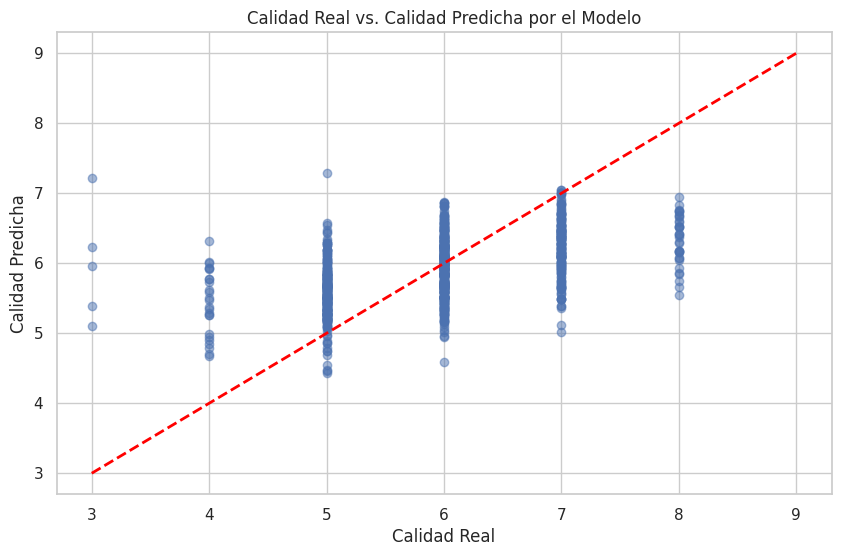

In [9]:
if not df_wine.empty:
    # Realizar predicciones
    y_pred = model_lr.predict(X_test)

    # Calcular métricas de evaluación
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
    print(f"Coeficiente de Determinación (R²): {r2:.4f}")
    
    # Visualización de predicciones vs valores reales
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red', linewidth=2)
    plt.xlabel("Calidad Real")
    plt.ylabel("Calidad Predicha")
    plt.title("Calidad Real vs. Calidad Predicha por el Modelo")
    plt.show()